In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)

%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## VIRTUS

In [2]:
list_samples = [str(i) for i in range(10)]

In [3]:
list_samples

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
s = list_samples[0]

In [5]:
for i,s in enumerate(list_samples):
    d = pd.read_csv('subsample_{}/virus.counts.final.tsv'.format(s), sep='\t')
    d.columns = ['virus', s, 'rate']
    d = d[['virus', s]]
    
    if i == 0:
        df_virtus = d.copy()
    else:
        df_virtus = pd.merge(df_virtus, d, how="outer")
        
df_virtus = df_virtus.fillna(0)

df_virtus.index = df_virtus.virus
# df_virtect = df_virtect.drop('virus')
df_virtus = df_virtus.drop(columns=['virus'])
df_virtus = df_virtus.sort_values(by='0', ascending=False)
df_virtus.head()

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,1883,1738,1714,1588,1551,1719,1667,1764,1820,1550


In [75]:
df_virtus /= 2

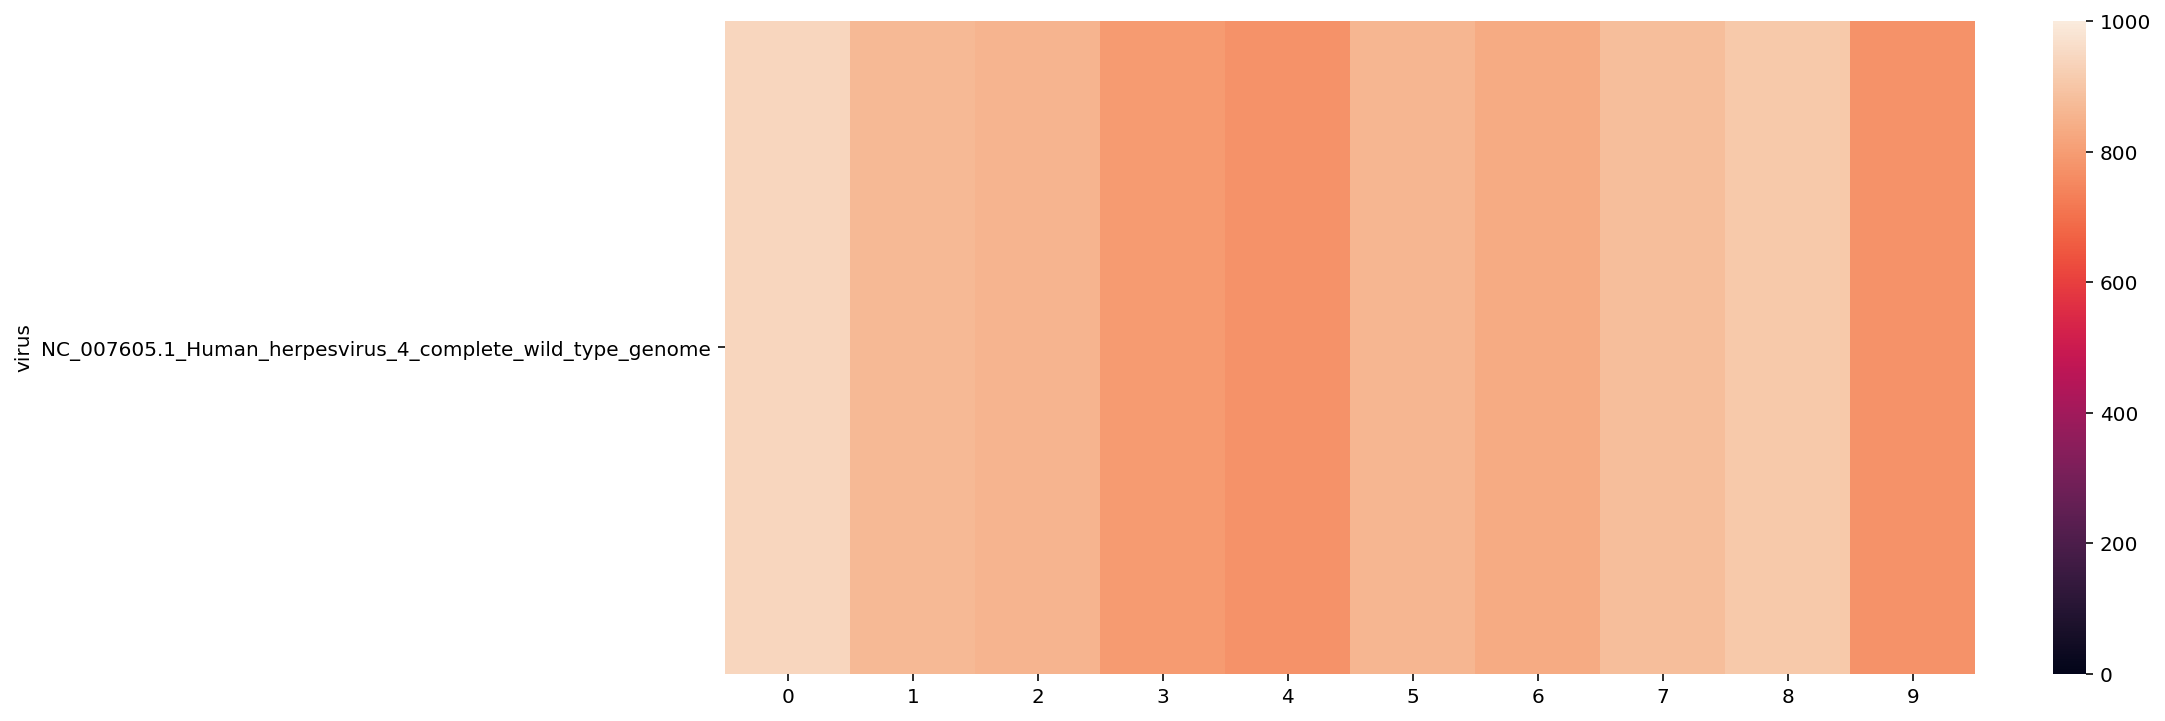

In [76]:
plt.figure(figsize=(14,6))
sns.heatmap(df_virtus, vmin=0, vmax=1000, annot=False)
plt.yticks(rotation=0)
plt.savefig('VIRTUS_heatmap.pdf', bbox_inches='tight')

In [48]:
for i,s in enumerate(list_samples):
    d = pd.read_csv('subsample_{}/virus.counts.final.tsv'.format(s), sep='\t')
    d.columns = ['virus', '_', s]
    d = d[['virus', s]]
    
    if i == 0:
        df_virtus = d.copy()
    else:
        df_virtus = pd.merge(df_virtus, d, how="outer")
        
df_virtus = df_virtus.fillna(0)

df_virtus.index = df_virtus.virus
# df_virtect = df_virtect.drop('virus')
df_virtus = df_virtus.drop(columns=['virus'])
df_virtus = df_virtus.sort_values(by='0', ascending=False)
df_virtus.head()

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,0.001883,0.001738,0.001714,0.001588,0.001551,0.001719,0.001667,0.001764,0.00182,0.00155


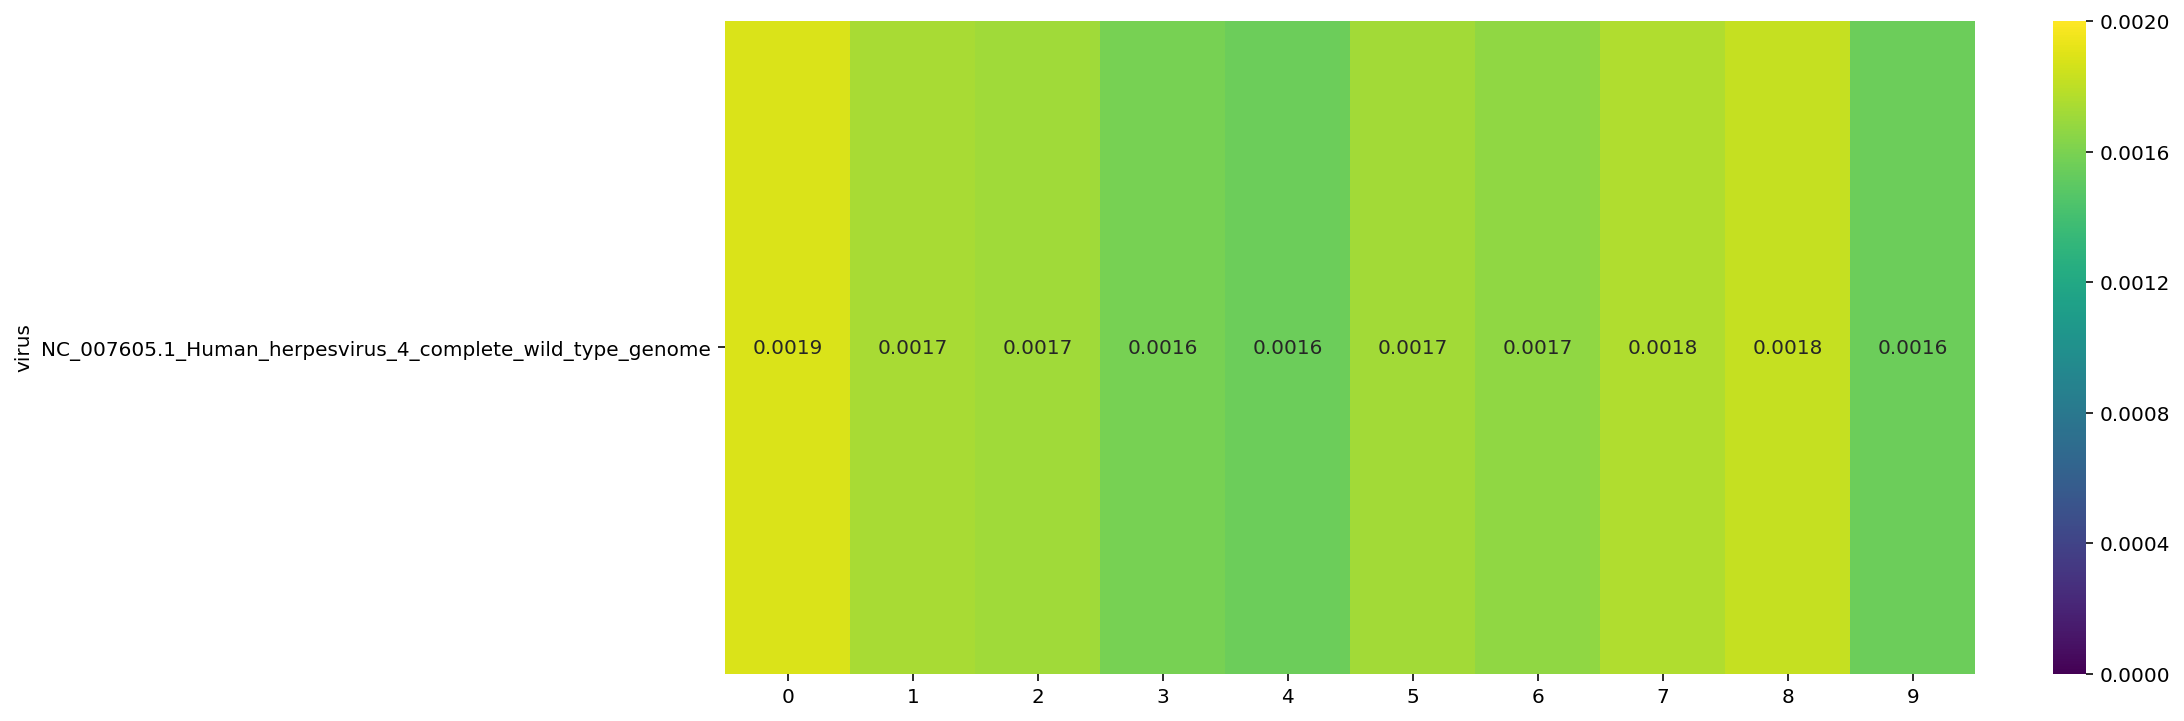

In [57]:
plt.figure(figsize=(14,6))
sns.heatmap(df_virtus, vmin=0, vmax=.002, annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.savefig('VIRTUS_heatmap.rate.pdf', bbox_inches='tight')

## smv

In [6]:
for i,s in enumerate(list_samples):
    d = pd.read_csv('subsample_{}/virus.smv.tsv'.format(s), sep='\t')
    d.columns = ['virus', s, 'rate']
    d = d[['virus', s]]
    
    if i == 0:
        df_virtus = d.copy()
    else:
        df_virtus = pd.merge(df_virtus, d, how="outer")
        
df_virtus = df_virtus.fillna(0)

df_virtus.index = df_virtus.virus
# df_virtect = df_virtect.drop('virus')
df_virtus = df_virtus.drop(columns=['virus'])
df_virtus = df_virtus.sort_values(by='0', ascending=False)
df_virtus.head()

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,941.5,869.0,856.0,794.0,775.5,859.5,833.5,882.0,909.0,775.0
"NC_009334.1_Human_herpesvirus_4,_complete_genome",36.0,37.0,30.0,39.0,28.0,26.0,28.0,34.0,32.0,38.0
"gi|12084981|lcl|HPV71REF.1|_Human_papillomavirus_71_(HPV71),_complete_genome",2.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
df_virtus.loc[df_virtus.max(axis=1) > 400]

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,941.5,869.0,856.0,794.0,775.5,859.5,833.5,882.0,909.0,775.0


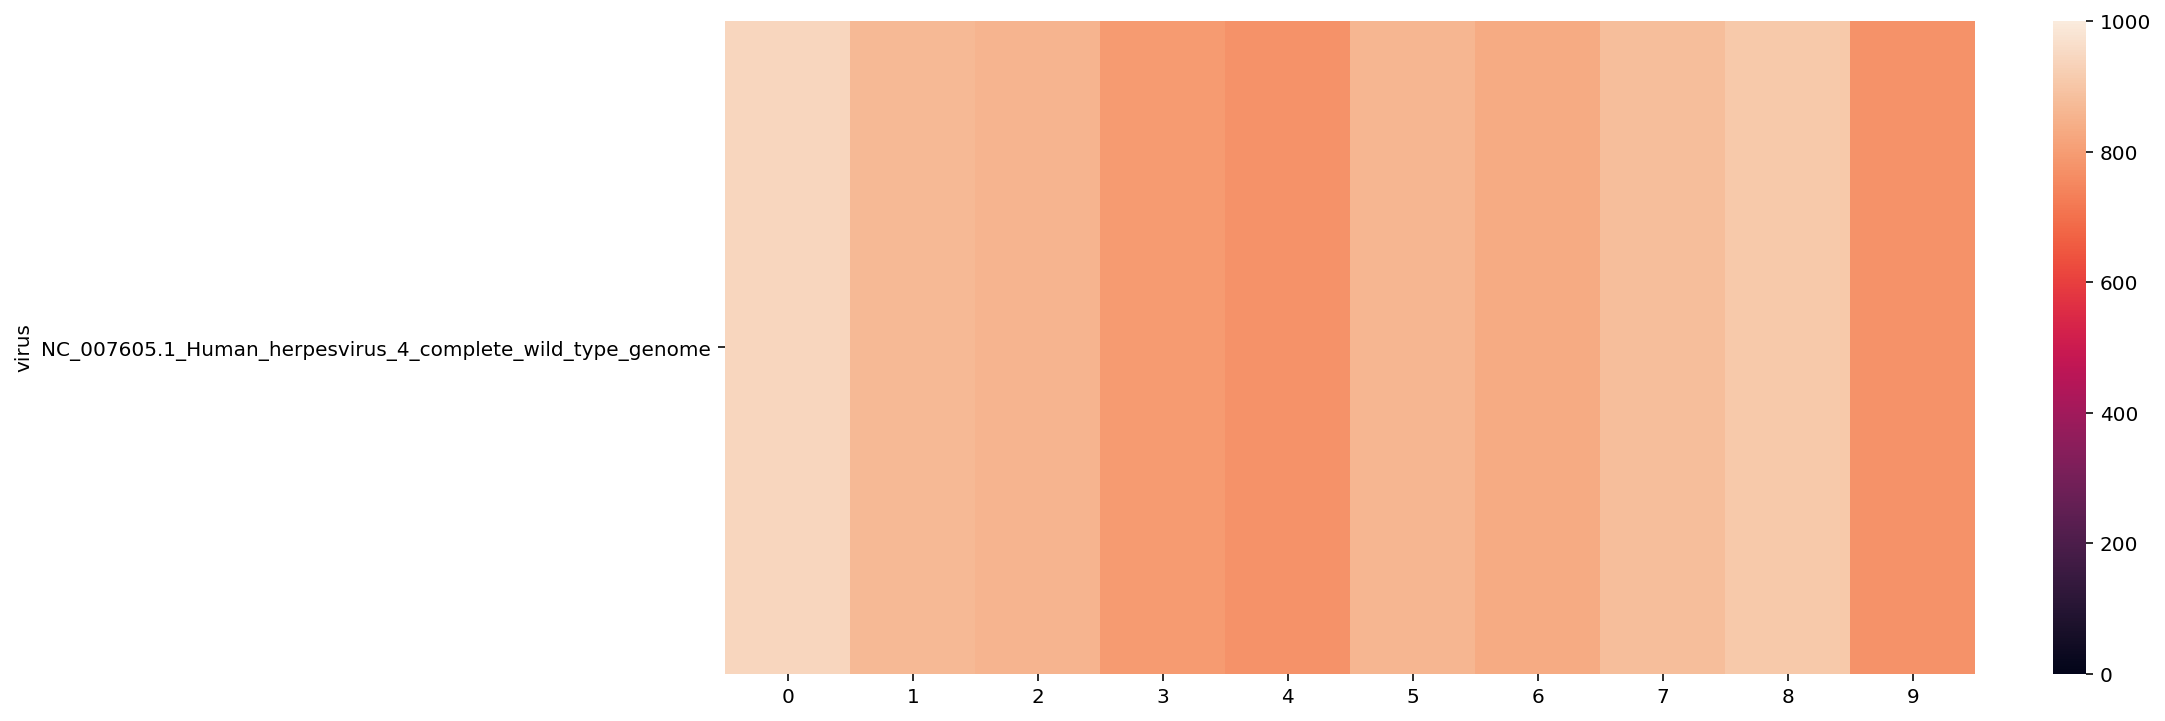

In [10]:
plt.figure(figsize=(14,6))
sns.heatmap(df_virtus.loc[df_virtus.max(axis=1) > 400], vmin=0, vmax=1000, annot=False)
plt.yticks(rotation=0)
plt.savefig('smv_heatmap.pdf', bbox_inches='tight')

In [11]:
df_virtus * 2

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,1883.0,1738.0,1712.0,1588.0,1551.0,1719.0,1667.0,1764.0,1818.0,1550.0
"NC_009334.1_Human_herpesvirus_4,_complete_genome",72.0,74.0,60.0,78.0,56.0,52.0,56.0,68.0,64.0,76.0
"gi|12084981|lcl|HPV71REF.1|_Human_papillomavirus_71_(HPV71),_complete_genome",4.0,4.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0


## kraken2

In [24]:
for i,s in enumerate(list_samples):
    d = pd.read_csv('subsample_{}/kraken2_report'.format(s), sep='\t', header=None)
    d.columns = ['percent', '-', s, 'code', 'ID', 'virus']
    d = d.loc[d['code'] == 'S', ['virus', s]]
    d = d[d[s] > 400]

    if i==0:
        df_kraken2 = d.copy()
    else:
        df_kraken2 = pd.merge(df_kraken2, d, how="outer")
df_kraken2 = df_kraken2.fillna(0)

df_kraken2.index = df_kraken2.virus
# df_virtect = df_virtect.drop('virus')
df_kraken2 = df_kraken2.drop(columns=['virus'])
df_kraken2 = df_kraken2.sort_values(by='0', ascending=False)
df_kraken2.head()

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
Choristoneura fumiferana granulovirus,25148,25158,24751,25072,25117,24981,24828,25017,24718.0,24780
Shamonda orthobunyavirus,9819,9968,9815,9826,9804,9731,9772,9827,9842.0,9665
BeAn 58058 virus,3329,3293,3198,3199,3297,3202,3240,3166,3175.0,3216
Proteus phage VB_PmiS-Isfahan,1290,1318,1308,1266,1286,1308,1287,1322,1271.0,1301
Human gammaherpesvirus 4,934,935,911,937,924,933,914,927,907.0,925


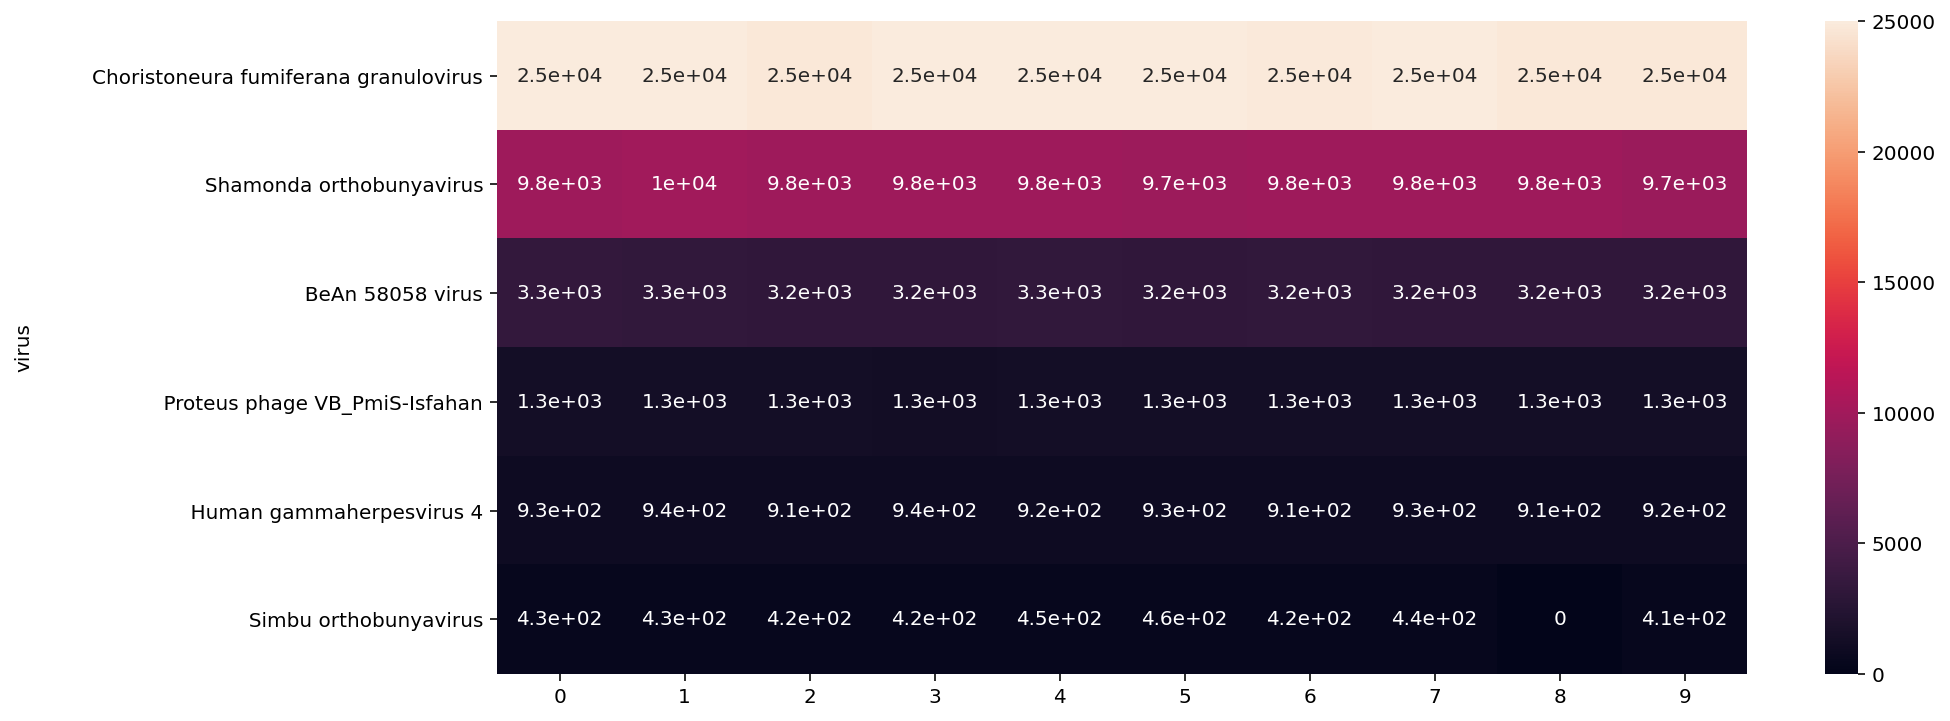

In [44]:
plt.figure(figsize=(14,6))
sns.heatmap(df_kraken2, vmin=0, vmax=25000, annot=True)
plt.savefig('kraken2_heatmap.pdf', bbox_inches='tight')

In [11]:
bqs=[0, 10, 20, 30, 40, 50]
confs=[0, 0.2, 0.4, 0.6, 0.8, 1]

In [92]:
i = 0
for b in bqs:
    for c in confs:
        for s in list_samples:
            n = 'seed {s}, minimum-base-quality {b}, confidence {c}'.format(s=s,b=b,c=c)
            d = pd.read_csv('subsample_{s}/kraken2_prams_bq{b}_conf{c}_report'.format(s=s,b=b,c=c), sep='\t', header=None)
            d.columns = ['percent', '-', n, 'code', 'ID', 'virus']
            d = d.loc[d['code'] == 'S', ['virus', n]]
            d = d[d[n] > 400]

            if i==0:
                df_kraken2 = d.copy()
                i = 1
            else:
                df_kraken2 = pd.merge(df_kraken2, d, how="outer")
df_kraken2 = df_kraken2.fillna(0)

df_kraken2.index = df_kraken2.virus
# df_virtect = df_virtect.drop('virus')
df_kraken2 = df_kraken2.drop(columns=['virus'])
# df_kraken2 = df_kraken2.sort_values(by='0', ascending=False)
df_kraken2.head()

,"seed 0, minimum-base-quality 0, confidence 0","seed 1, minimum-base-quality 0, confidence 0","seed 2, minimum-base-quality 0, confidence 0","seed 3, minimum-base-quality 0, confidence 0","seed 4, minimum-base-quality 0, confidence 0","seed 5, minimum-base-quality 0, confidence 0","seed 6, minimum-base-quality 0, confidence 0","seed 7, minimum-base-quality 0, confidence 0","seed 8, minimum-base-quality 0, confidence 0","seed 9, minimum-base-quality 0, confidence 0",...,"seed 0, minimum-base-quality 50, confidence 1","seed 1, minimum-base-quality 50, confidence 1","seed 2, minimum-base-quality 50, confidence 1","seed 3, minimum-base-quality 50, confidence 1","seed 4, minimum-base-quality 50, confidence 1","seed 5, minimum-base-quality 50, confidence 1","seed 6, minimum-base-quality 50, confidence 1","seed 7, minimum-base-quality 50, confidence 1","seed 8, minimum-base-quality 50, confidence 1","seed 9, minimum-base-quality 50, confidence 1"
virus,,,,,,,,,,,,,,,,,,,,,
Choristoneura fumiferana granulovirus,25148,25158,24751,25072,25117,24981,24828,25017,24718.0,24780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shamonda orthobunyavirus,9819,9968,9815,9826,9804,9731,9772,9827,9842.0,9665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Simbu orthobunyavirus,428,434,421,421,448,455,419,444,0.0,413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BeAn 58058 virus,3329,3293,3198,3199,3297,3202,3240,3166,3175.0,3216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Proteus phage VB_PmiS-Isfahan,1290,1318,1308,1266,1286,1308,1287,1322,1271.0,1301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
x = 'seed 1, minimum-base-quality 0, confidence 0'

In [95]:
x[x.find('minimum'):]

'minimum-base-quality 0, confidence 0'

In [105]:
df_kraken2_plot = df_kraken2.copy()
df_kraken2_plot.columns = [x[x.find('minimum'):] for x in df_kraken2_plot.columns]

In [108]:
[x for i,x in enumerate(df_kraken2_plot.columns) if i%10==0]

['minimum-base-quality 0, confidence 0',
 'minimum-base-quality 0, confidence 0.2',
 'minimum-base-quality 0, confidence 0.4',
 'minimum-base-quality 0, confidence 0.6',
 'minimum-base-quality 0, confidence 0.8',
 'minimum-base-quality 0, confidence 1',
 'minimum-base-quality 10, confidence 0',
 'minimum-base-quality 10, confidence 0.2',
 'minimum-base-quality 10, confidence 0.4',
 'minimum-base-quality 10, confidence 0.6',
 'minimum-base-quality 10, confidence 0.8',
 'minimum-base-quality 10, confidence 1',
 'minimum-base-quality 20, confidence 0',
 'minimum-base-quality 20, confidence 0.2',
 'minimum-base-quality 20, confidence 0.4',
 'minimum-base-quality 20, confidence 0.6',
 'minimum-base-quality 20, confidence 0.8',
 'minimum-base-quality 20, confidence 1',
 'minimum-base-quality 30, confidence 0',
 'minimum-base-quality 30, confidence 0.2',
 'minimum-base-quality 30, confidence 0.4',
 'minimum-base-quality 30, confidence 0.6',
 'minimum-base-quality 30, confidence 0.8',
 'minimu

In [109]:
[i for i,x in enumerate(df_kraken2_plot.columns) if i%10==0]

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350]

In [ ]:
[x[x.find('minimum'):]  if i%10==0 else ""
                           for i,x in enumerate(df_kraken2_plot.columns)]

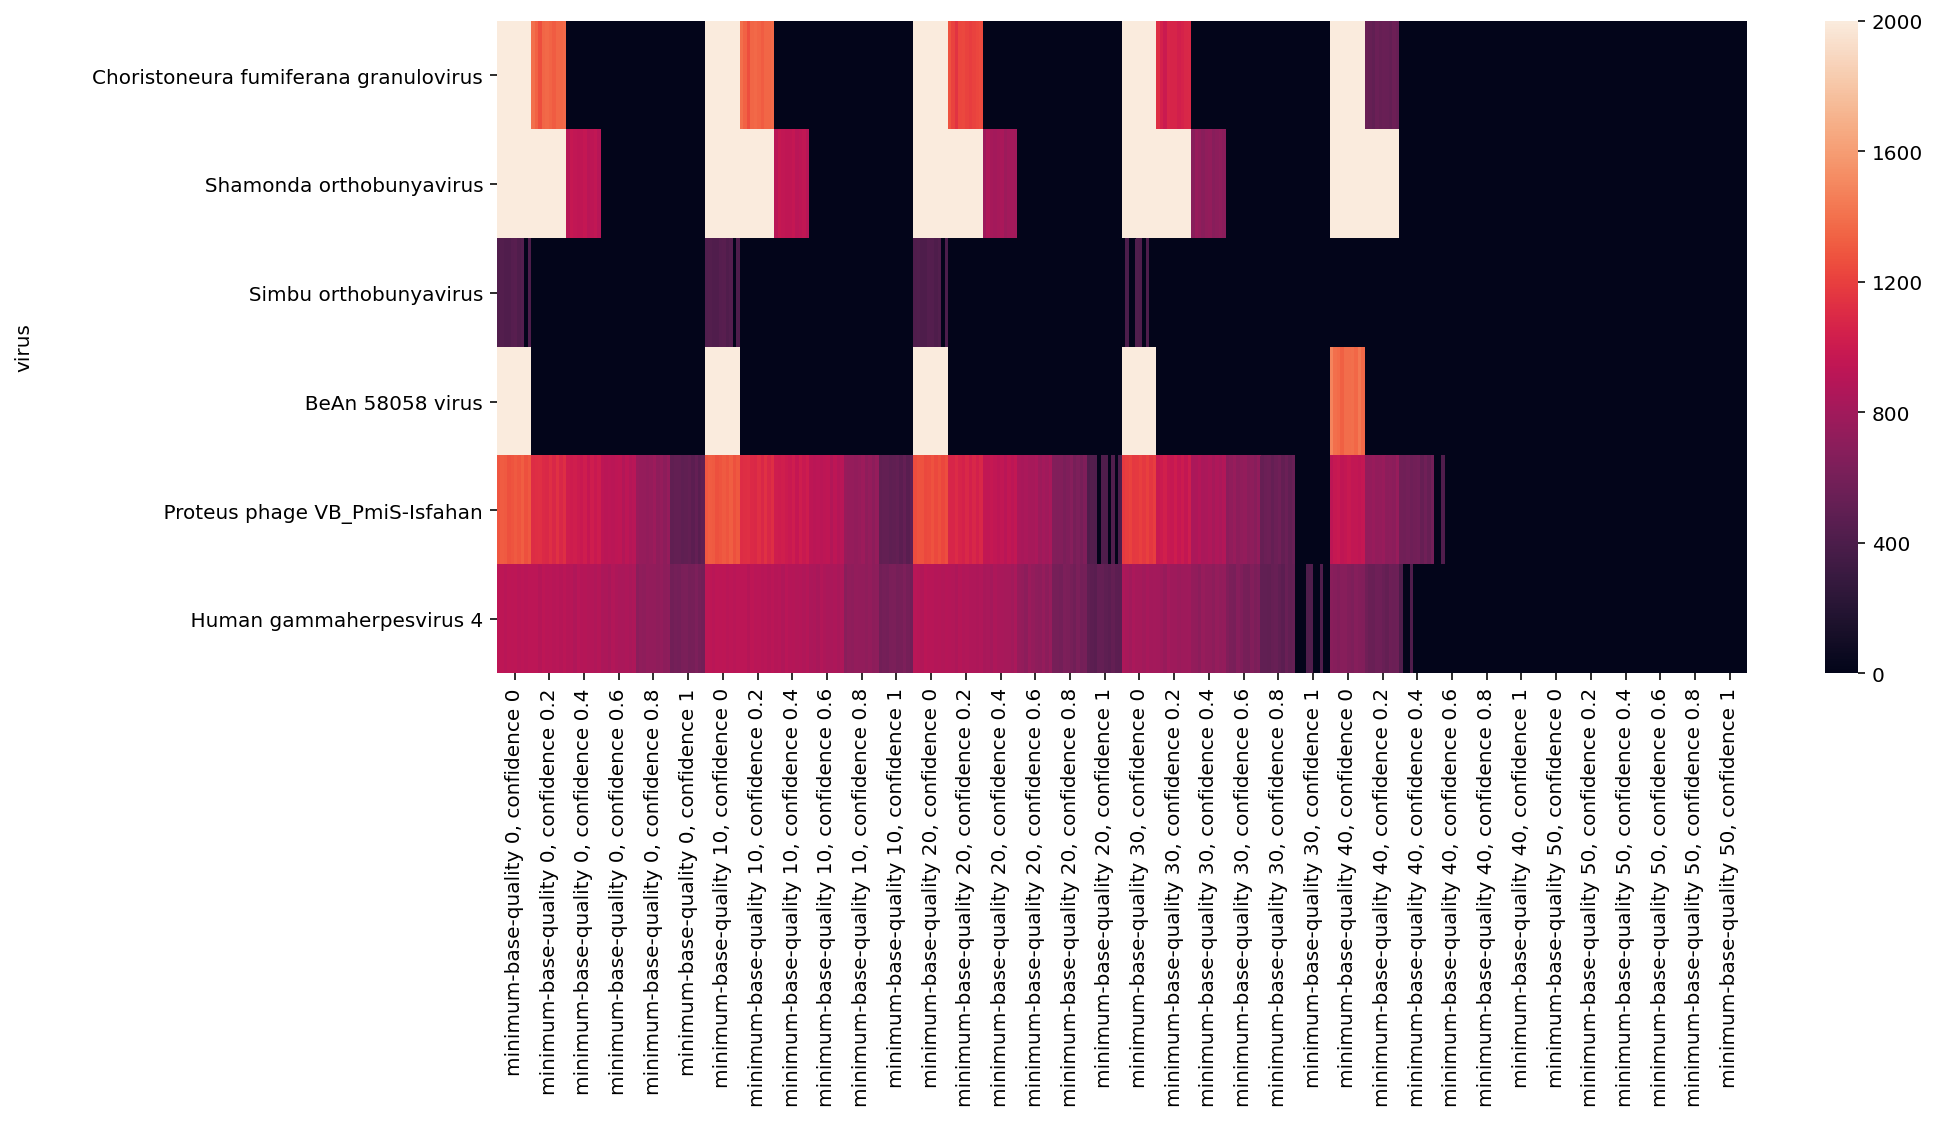

In [113]:
plt.figure(figsize=(14,6))
sns.heatmap(df_kraken2_plot, vmax=2000)
plt.xticks([i for i,x in enumerate(df_kraken2_plot.columns) if i%10==5],
           [x for i,x in enumerate(df_kraken2_plot.columns) if i%10==0])
plt.savefig('kraken2_heatmap.params.pdf', bbox_inches='tight')

In [ ]:
ktImportTaxonomy -q 2 -t 3  kraken2_prams_bq10_conf0.4_output -o  kraken2_prams_bq10_conf0.4_output.html


In [84]:
i = 0
for b in [10]:
    for c in [0.4]:
        for s in list_samples:
            n = 'seed {s}, minimum-base-quality {b}, confidence {c}'.format(s=s,b=b,c=c)
            d = pd.read_csv('subsample_{s}/kraken2_prams_bq{b}_conf{c}_report'.format(s=s,b=b,c=c), sep='\t', header=None)
            d.columns = ['percent', '-', n, 'code', 'ID', 'virus']
            d = d.loc[d['code'] == 'S', ['virus', n]]
            d = d[d[n] > 400]

            if i==0:
                df_kraken2 = d.copy()
                i = 1
            else:
                df_kraken2 = pd.merge(df_kraken2, d, how="outer")
df_kraken2 = df_kraken2.fillna(0)

df_kraken2.index = df_kraken2.virus
# df_virtect = df_virtect.drop('virus')
df_kraken2 = df_kraken2.drop(columns=['virus'])
# df_kraken2 = df_kraken2.sort_values(by='0', ascending=False)
df_kraken2.head()

,"seed 0, minimum-base-quality 10, confidence 0.4","seed 1, minimum-base-quality 10, confidence 0.4","seed 2, minimum-base-quality 10, confidence 0.4","seed 3, minimum-base-quality 10, confidence 0.4","seed 4, minimum-base-quality 10, confidence 0.4","seed 5, minimum-base-quality 10, confidence 0.4","seed 6, minimum-base-quality 10, confidence 0.4","seed 7, minimum-base-quality 10, confidence 0.4","seed 8, minimum-base-quality 10, confidence 0.4","seed 9, minimum-base-quality 10, confidence 0.4"
virus,,,,,,,,,,
Proteus phage VB_PmiS-Isfahan,1018,1008,1027,1002,991,1020,966,1023,977,1008
Shamonda orthobunyavirus,913,976,948,942,944,964,914,932,951,906
Human gammaherpesvirus 4,896,903,872,909,889,895,881,888,873,897


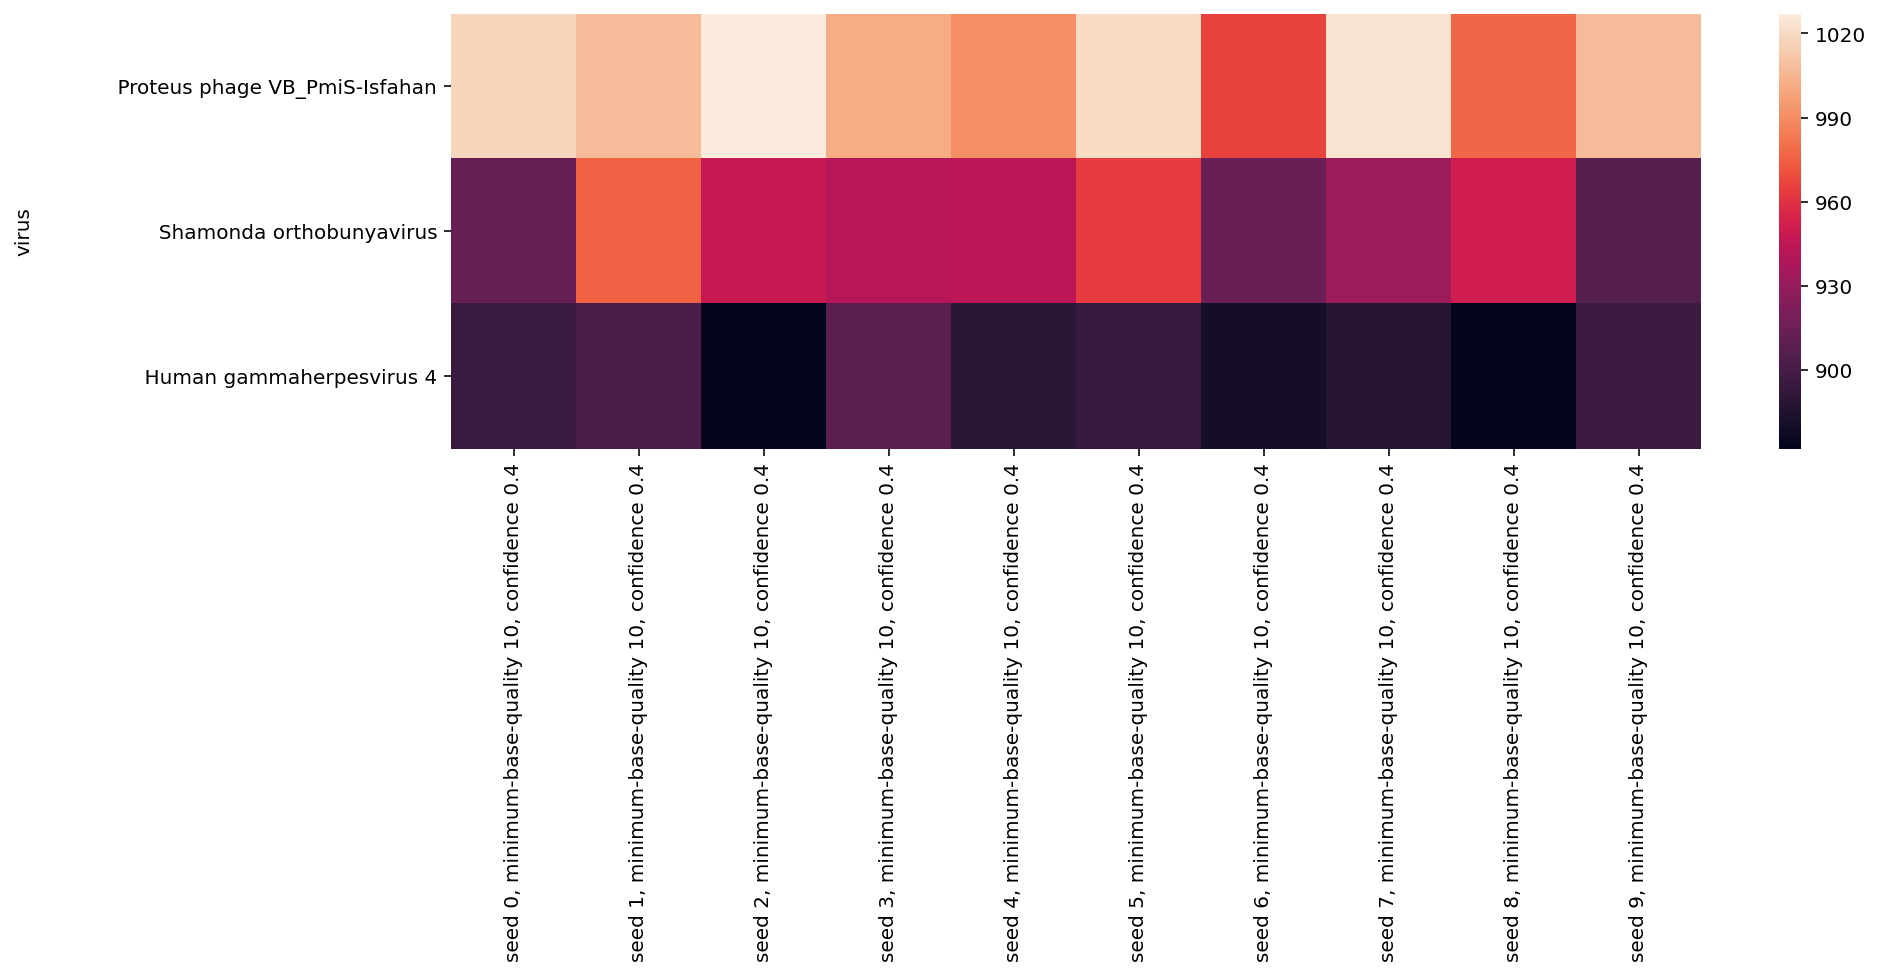

In [85]:
plt.figure(figsize=(14,4))
sns.heatmap(df_kraken2, annot=False)
plt.savefig('kraken2_heatmap.params.conf0.4.pdf', bbox_inches='tight')

## Virtect

In [6]:
s = '0'

In [7]:
pd.read_csv('subsample_{}/VirTect/unmapped_viruses_count.txt'.format(s), 
            delim_whitespace=True, skiprows=1, header=None)

,0,1
0,846,"NC_001798.1_Human_herpesvirus_2,_complete_genome"
1,860,NC_007605.1_Human_herpesvirus_4_complete_wild_...
2,526,"NC_009334.1_Human_herpesvirus_4,_complete_genome"
3,2347,"NC_018464.1_Shamonda_virus_N_and_NSs_genes,_se..."


In [67]:

for i,s in enumerate(list_samples):
    d = pd.read_csv('subsample_{}/VirTect/unmapped_viruses_count.txt'.format(s), 
            delim_whitespace=True, skiprows=1, header=None)
    d.columns = [s, 'virus']
    d = d[['virus', s]]
    d = d[d[s] > 400]
    
    if i == 0:
        df_virtect = d.copy()
    else:
        df_virtect = pd.merge(df_virtect, d, how="outer")
        
df_virtect = df_virtect.fillna(0)

df_virtect.index = df_virtect.virus
# df_virtect = df_virtect.drop('virus')
df_virtect = df_virtect.drop(columns=['virus'])
df_virtect = df_virtect.sort_values(by='0', ascending=False)
df_virtect.head()

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
"NC_018464.1_Shamonda_virus_N_and_NSs_genes,_segment_S,_genomic_RNA,_isolate_Ib_An_5550",2347,2399,2438,2420,2400,2372,2357,2326,2431,2285
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,860,860,818,863,798,854,824,806,806,854
"NC_001798.1_Human_herpesvirus_2,_complete_genome",846,740,774,742,798,808,796,820,768,836
"NC_009334.1_Human_herpesvirus_4,_complete_genome",526,525,592,530,570,536,533,570,601,576


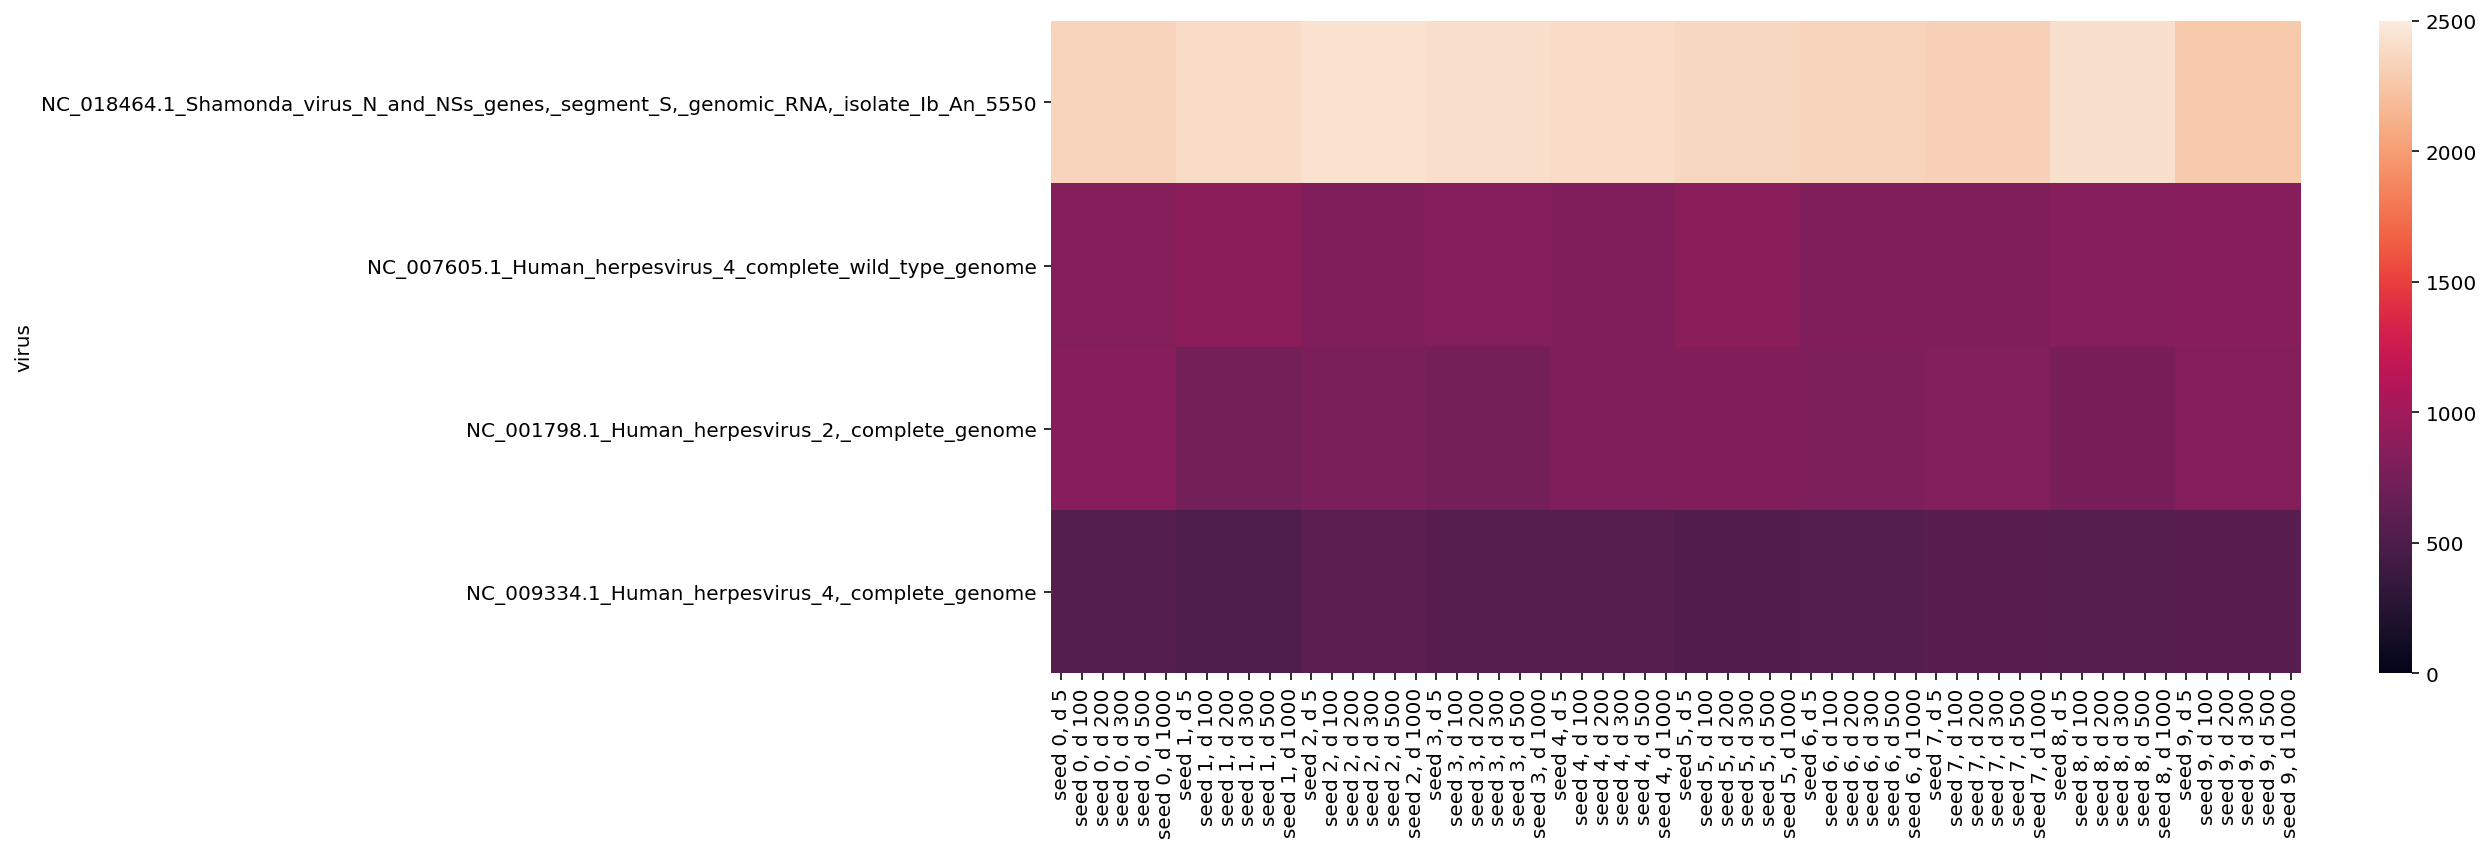

In [86]:
plt.figure(figsize=(14,6))
sns.heatmap(df_virtect, vmin=0, vmax=2500, annot=False)
plt.yticks(rotation=0)
plt.savefig('VirTect_heatmap.params.pdf', bbox_inches='tight')

In [69]:
list_d = [5, 100, 200, 300, 500, 1000]

In [70]:
i = 0
for s in list_samples:
    for param_d in list_d:
        n = 'seed {s}, d {d}'.format(s=s, d=param_d)
        d = pd.read_csv('subsample_{s}/VirTect_param_d{d}/unmapped_viruses_count.txt'.format(s=s, d=param_d), 
                delim_whitespace=True, skiprows=1, header=None)
        d.columns = [n, 'virus']
        d = d[['virus', n]]
        d = d[d[n] > 400]

        if i == 0:
            df_virtect = d.copy()
            i = 1
        else:
            df_virtect = pd.merge(df_virtect, d, how="outer")
        
df_virtect = df_virtect.fillna(0)

df_virtect.index = df_virtect.virus
# df_virtect = df_virtect.drop('virus')
df_virtect = df_virtect.drop(columns=['virus'])
df_virtect = df_virtect.sort_values(by=n, ascending=False)
df_virtect.head()

,"seed 0, d 5","seed 0, d 100","seed 0, d 200","seed 0, d 300","seed 0, d 500","seed 0, d 1000","seed 1, d 5","seed 1, d 100","seed 1, d 200","seed 1, d 300",...,"seed 8, d 200","seed 8, d 300","seed 8, d 500","seed 8, d 1000","seed 9, d 5","seed 9, d 100","seed 9, d 200","seed 9, d 300","seed 9, d 500","seed 9, d 1000"
virus,,,,,,,,,,,,,,,,,,,,,
"NC_018464.1_Shamonda_virus_N_and_NSs_genes,_segment_S,_genomic_RNA,_isolate_Ib_An_5550",2345,2345,2345,2345,2345,2345,2399,2399,2399,2399,...,2427,2427,2427,2427,2285,2285,2285,2285,2285,2285
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,831,831,831,831,831,831,875,875,875,875,...,844,844,844,844,854,854,854,854,854,854
"NC_001798.1_Human_herpesvirus_2,_complete_genome",852,852,852,852,852,852,736,736,736,736,...,768,768,768,768,836,836,836,836,836,836
"NC_009334.1_Human_herpesvirus_4,_complete_genome",553,553,553,553,553,553,514,514,514,514,...,561,561,561,561,576,576,576,576,576,576


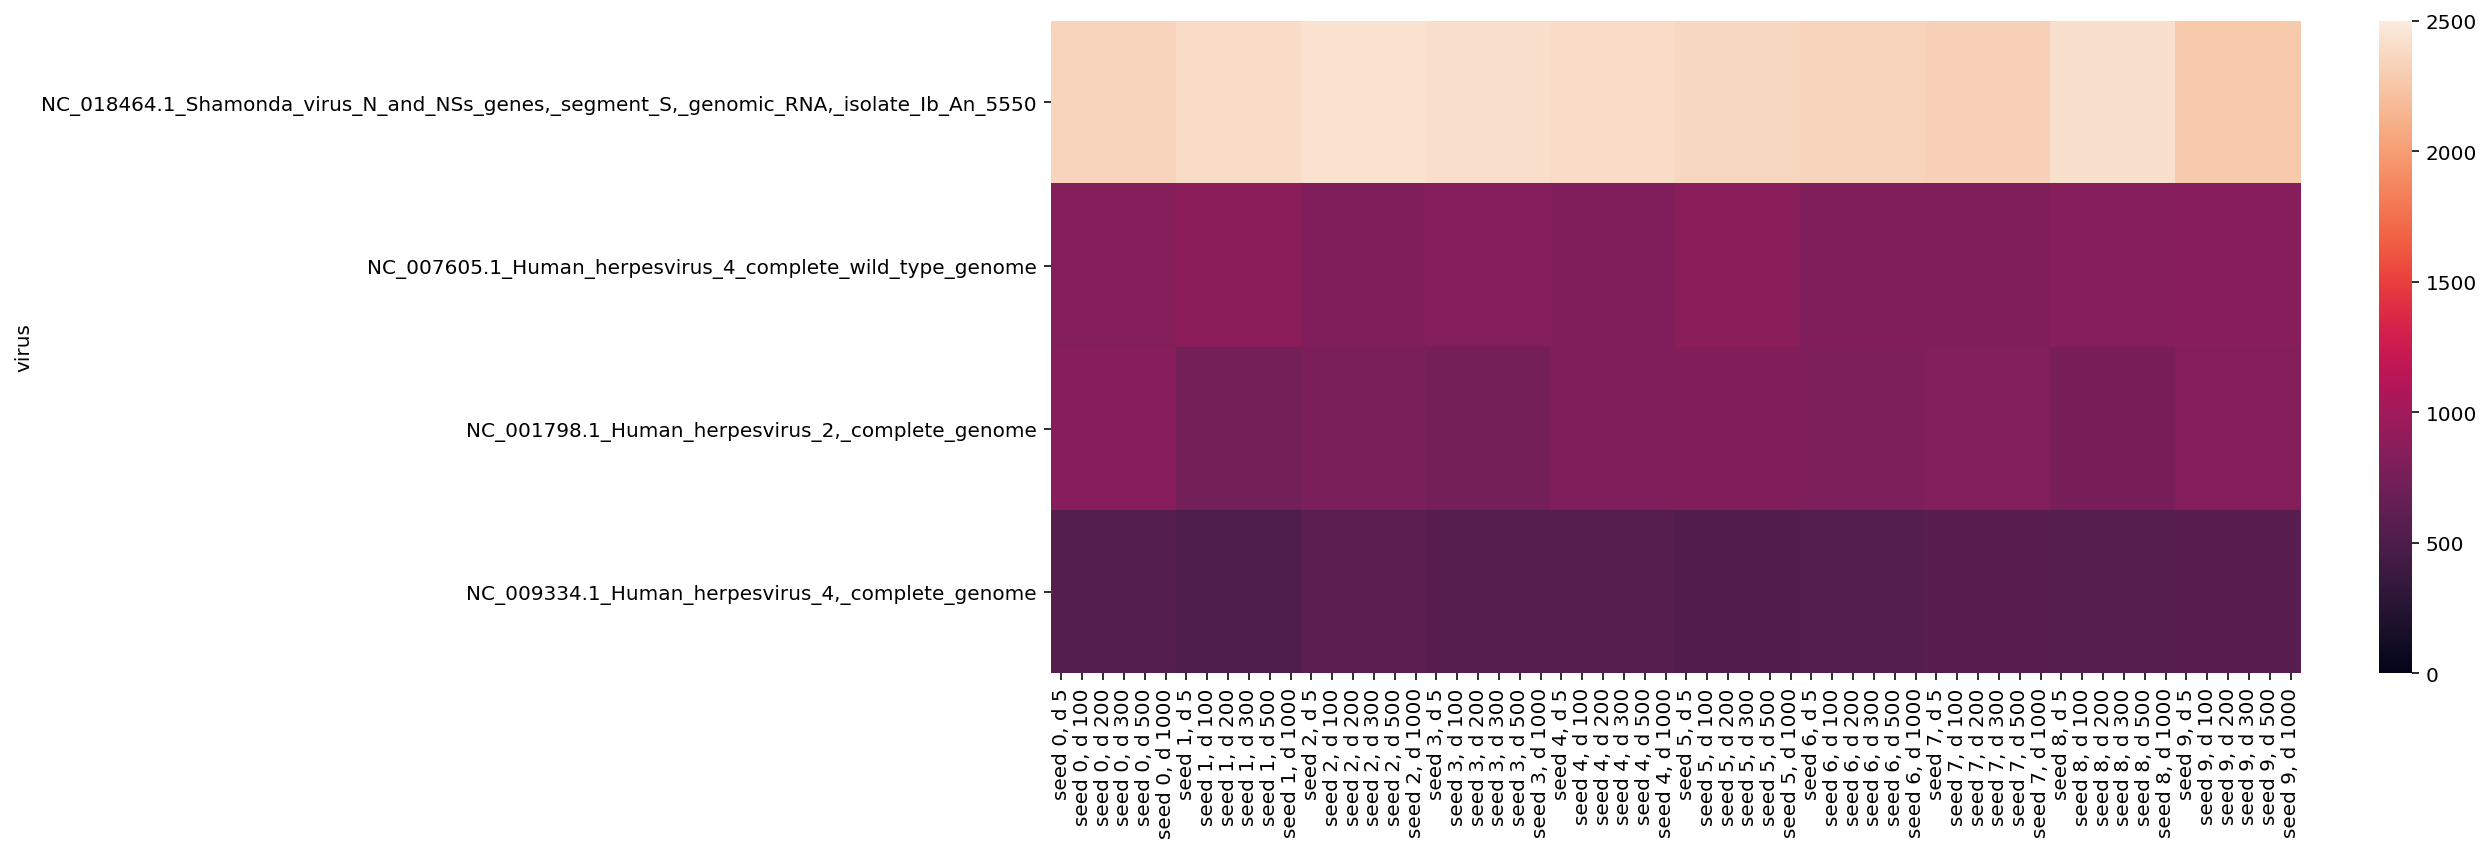

In [72]:
plt.figure(figsize=(14,6))
sns.heatmap(df_virtect, vmin=0, vmax=2500, annot=False)
plt.yticks(rotation=0)
plt.savefig('VirTect_heatmap.params.pdf', bbox_inches='tight')